In [21]:
# Import of the necessary python libraries
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt

In [22]:
# Define the risk-free rate rf for the calculation (for calculation of rf see the Excel tables)
rf = 0.006

In [23]:
# Creating a list-variable for the chosen indices
symbols = ['^STOXX50E','^DJI','^N225']
noa = len(symbols)

In [24]:
# Import of financial data from Yahoo Finance
prices = pd.DataFrame()
for sym in symbols:
    prices[sym] = web.DataReader(sym, data_source='yahoo',start='31/12/2018',end ='31/12/2019')['Adj Close']
prices = prices.dropna()
prices.head()

,^STOXX50E,^DJI,^N225
Date,,,
2019-01-04,3041.850098,23433.160156,19561.960938
2019-01-07,3033.639893,23531.349609,20038.970703
2019-01-08,3054.939941,23787.449219,20204.039062
2019-01-09,3070.239990,23879.119141,20427.060547
2019-01-10,3075.729980,24001.919922,20163.800781


In [25]:
# Calculating the Covariance-Matrix of the chosen indices
cov_matrix = prices.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,^STOXX50E,^DJI,^N225
^STOXX50E,0.000070,0.000047,0.000018
^DJI,0.000047,0.000057,0.000013
^N225,0.000018,0.000013,0.000079


In [26]:
# Calculating the expected return of the chosen indices ex post
e_r = prices.resample("D").last().pct_change().mean()*250
e_r

^STOXX50E    0.150571
^DJI         0.139485
^N225        0.138236
dtype: float64

In [27]:
# Calculating the standard diviation / volatility of the chosen indices
sd = prices.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
sd

^STOXX50E    0.132098
^DJI         0.118891
^N225        0.140780
dtype: float64

In [28]:
# Concatenation of the indices and the returns/volatility
assets = pd.concat([e_r, sd], axis=1)
assets.columns = ["Returns", "Volatility"]
assets

,Returns,Volatility
^STOXX50E,0.150571,0.132098
^DJI,0.139485,0.118891
^N225,0.138236,0.140780


In [29]:
# Creating blanco lists for the portfolio return, portfolio volatility and the weights of the particular indices
# In addition, setting the number of determined portfolios to 2500 --> Law of large numbers
p_ret = []
p_vol = []
p_weights = []

num_assets = len(prices.columns)
num_portfolios = 2500

In [30]:
# Calculation of the weights of the particular indices by frequently random
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, e_r)
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    sd = np.sqrt(var)
    ann_sd = sd*np.sqrt(250)
    p_vol.append(ann_sd)

In [31]:
# Return and Volatility Variables for plotting the portfolios
port_ret = np.array(p_ret)
port_vol = np.array(p_vol)

In [32]:
data = {"Returns": p_ret, "Volatility": p_vol}

In [33]:
for counter, symbol in enumerate(prices.columns.tolist()):
    data[symbol+" weight"] = [w[counter] for w in p_weights]

In [34]:
portfolios = pd.DataFrame(data)

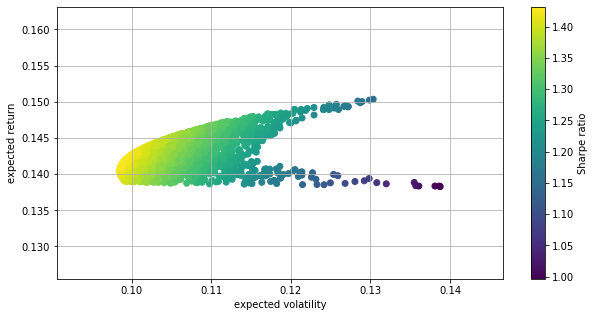

In [35]:
# Plotting the 2500 calculated portfolios and the Sharpe ratio in the colorbar
plt.figure(figsize=(10, 5))
plt.scatter(port_vol,port_ret,c=port_ret/port_vol, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [36]:
# Summary of the MVP with Return, Volatility and the particular weights
min_var_port = portfolios.iloc[portfolios["Volatility"].idxmin()]
min_var_port

Returns             0.140461
Volatility          0.098500
^STOXX50E weight    0.130643
^DJI weight         0.491061
^N225 weight        0.378296
Name: 727, dtype: float64

In [37]:
sharpe_ratio_mvp = (min_var_port["Returns"] - rf) / min_var_port["Volatility"]
sharpe_ratio_mvp

1.365090297895295

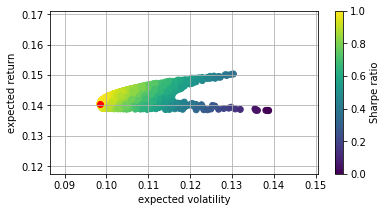

In [38]:
# Visualization of the MVP into the portfolio figure with a red point
plt.subplots(figsize=(6,3))
plt.scatter(portfolios["Volatility"], portfolios["Returns"], c = portfolios["Returns"]/portfolios["Volatility"])
plt.scatter(min_var_port[1], min_var_port[0], color="r")
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [39]:
# The portfolio with the maximum sharpe ratio is saved in the variable optimal_risky_portfolio and the summary is shown below
optimal_risky_portfolio = portfolios.iloc[((portfolios["Returns"]-rf)/portfolios["Volatility"]).idxmax()]
optimal_risky_portfolio

Returns             0.141686
Volatility          0.098961
^STOXX50E weight    0.239136
^DJI weight         0.400323
^N225 weight        0.360541
Name: 2147, dtype: float64

In [40]:
sharpe_ratio = (optimal_risky_portfolio["Returns"] - rf) / optimal_risky_portfolio["Volatility"]
sharpe_ratio

1.3711087871199652

C:\Users\henri\anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  del sys.path[0]


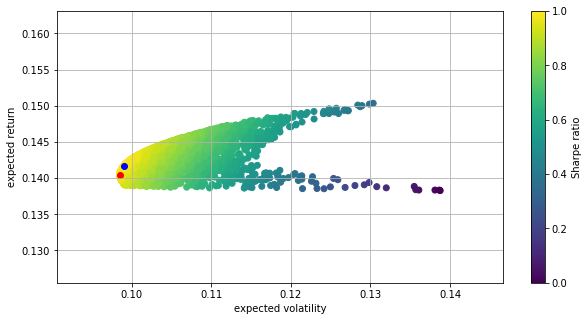

In [42]:
# Visualization of the optimal risky portfolio into the previous figure with a blue point
plt.subplots(figsize=(10,5))
plt.scatter(portfolios["Volatility"], portfolios["Returns"], c = portfolios["Returns"]/portfolios["Volatility"])
plt.scatter(min_var_port[1], min_var_port[0], color="r")
plt.scatter(optimal_risky_portfolio[1], optimal_risky_portfolio[0], color="b")
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# Safe the figure to the computer (optional)
plt.savefig("port_dev", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)